# Preprocessing 

In [36]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Load the dataset
df = pd.read_csv('framingham.csv')


# Step 1: Handle missing values - use median for numerical columns
imputer = SimpleImputer(strategy='median')
df[['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']] = imputer.fit_transform(
    df[['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']])



# Step 2: Separate features and target variable
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']



# Step 3: Scale numerical features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)



# Step 4: Handle class imbalance using manual oversampling
# Combine X and y for easier resampling
df_resampled = pd.concat([X, y], axis=1)

# Separate majority and minority classes
df_majority = df_resampled[df_resampled.TenYearCHD == 0]
df_minority = df_resampled[df_resampled.TenYearCHD == 1]

# Upsample the minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,              # Sample with replacement
                                 n_samples=len(df_majority), # Match majority class size
                                 random_state=42)           # Reproducible results

# Combine majority and upsampled minority
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Separate features and target variable after balancing
X_balanced = df_balanced.drop(columns=['TenYearCHD'])
y_balanced = df_balanced['TenYearCHD']


# Configuration: Proportional Training and Testing

In [39]:
# Import libraries needed
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Proportional Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42)

# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', probability=True, random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Proportional Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)


Logistic Regression - Proportional Accuracy: 0.6692
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.68      0.67       720
           1       0.67      0.66      0.67       719

    accuracy                           0.67      1439
   macro avg       0.67      0.67      0.67      1439
weighted avg       0.67      0.67      0.67      1439

Confusion Matrix:
 [[488 232]
 [244 475]]
--------------------------------------------------
Random Forest - Proportional Accuracy: 0.9632
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       720
           1       0.95      0.98      0.96       719

    accuracy                           0.96      1439
   macro avg       0.96      0.96      0.96      1439
weighted avg       0.96      0.96      0.96      1439

Confusion Matrix:
 [[684  36]
 [ 17 702]]
--------------------------------------------------
Gradient Boost

# Configuration: Equal Training and Proportional Testing

In [41]:
# Equal Training and Proportional Testing
# Step 1: Perform proportional split for the testing set
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42)

# Step 2: Balance the classes in the training set
train_df = pd.concat([X_train, y_train], axis=1)
train_majority = train_df[train_df.TenYearCHD == 0]
train_minority = train_df[train_df.TenYearCHD == 1]

# Resample the minority class in the training set
train_minority_upsampled = resample(train_minority, replace=True, n_samples=len(train_majority), random_state=42)
train_balanced = pd.concat([train_majority, train_minority_upsampled])

# Extract the balanced training set
X_train = train_balanced.drop(columns=['TenYearCHD'])
y_train = train_balanced['TenYearCHD']

# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', probability=True, random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Equal Training Proportional Testing Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)


Logistic Regression - Equal Training Proportional Testing Accuracy: 0.6706
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.68      0.67       720
           1       0.67      0.66      0.67       719

    accuracy                           0.67      1439
   macro avg       0.67      0.67      0.67      1439
weighted avg       0.67      0.67      0.67      1439

Confusion Matrix:
 [[490 230]
 [244 475]]
--------------------------------------------------
Random Forest - Equal Training Proportional Testing Accuracy: 0.9486
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       720
           1       0.96      0.94      0.95       719

    accuracy                           0.95      1439
   macro avg       0.95      0.95      0.95      1439
weighted avg       0.95      0.95      0.95      1439

Confusion Matrix:
 [[691  29]
 [ 45 674]]
-------------------

# Configuration: Proportional Training and Equal Testing

In [43]:
# Proportional Training and Equal Testing
# Step 1: Perform a proportional split for the training set
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42)

# Step 2: Balance the classes in the testing set
test_df = pd.concat([X_test, y_test], axis=1)
test_majority = test_df[test_df.TenYearCHD == 0]
test_minority = test_df[test_df.TenYearCHD == 1]

# Resample the minority class in the testing set to match majority class size
test_minority_upsampled = resample(test_minority, replace=True, n_samples=len(test_majority), random_state=42)
test_balanced = pd.concat([test_majority, test_minority_upsampled])

# Extract the balanced testing set
X_test = test_balanced.drop(columns=['TenYearCHD'])
y_test = test_balanced['TenYearCHD']

# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', probability=True, random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Proportional Training Equal Testing Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)


Logistic Regression - Proportional Training Equal Testing Accuracy: 0.6840
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.68      0.68       720
           1       0.68      0.69      0.69       720

    accuracy                           0.68      1440
   macro avg       0.68      0.68      0.68      1440
weighted avg       0.68      0.68      0.68      1440

Confusion Matrix:
 [[488 232]
 [223 497]]
--------------------------------------------------
Random Forest - Proportional Training Equal Testing Accuracy: 0.9639
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       720
           1       0.95      0.98      0.96       720

    accuracy                           0.96      1440
   macro avg       0.96      0.96      0.96      1440
weighted avg       0.96      0.96      0.96      1440

Confusion Matrix:
 [[684  36]
 [ 16 704]]
-------------------

# Configuration: Equal Training and Testing

In [58]:
# Equal Training and Testing
# Step 1: Perform an equal split for both training and testing sets
majority_class = df_balanced[df_balanced.TenYearCHD == 0]
minority_class = df_balanced[df_balanced.TenYearCHD == 1]

# Perform a balanced split
majority_train, majority_test = train_test_split(majority_class, test_size=0.2, random_state=42)
minority_train, minority_test = train_test_split(minority_class, test_size=0.2, random_state=42)

# Combine majority and minority sets for training and testing
train_balanced = pd.concat([majority_train, minority_train])
test_balanced = pd.concat([majority_test, minority_test])

# Separate features and target variable
X_train = train_balanced.drop(columns=['TenYearCHD'])
y_train = train_balanced['TenYearCHD']
X_test = test_balanced.drop(columns=['TenYearCHD'])
y_test = test_balanced['TenYearCHD']

# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', probability=True, random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Equal Training and Testing Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)


Logistic Regression - Equal Training and Testing Accuracy: 0.6826
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68       720
           1       0.68      0.69      0.68       720

    accuracy                           0.68      1440
   macro avg       0.68      0.68      0.68      1440
weighted avg       0.68      0.68      0.68      1440

Confusion Matrix:
 [[489 231]
 [226 494]]
--------------------------------------------------
Random Forest - Equal Training and Testing Accuracy: 0.9757
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       720
           1       0.97      0.98      0.98       720

    accuracy                           0.98      1440
   macro avg       0.98      0.98      0.98      1440
weighted avg       0.98      0.98      0.98      1440

Confusion Matrix:
 [[698  22]
 [ 13 707]]
-------------------------------------

## Graph

In [2]:
results = {
    "Proportional Train/Test": {
        "Logistic Regression": 0.6692,
        "Random Forest": 0.9632,
        "Gradient Boosting": 0.7290,
        "Support Vector Machine": 0.6616,
    },
    "Equal Train/Prop Test": {
        "Logistic Regression": 0.6706,
        "Random Forest": 0.9486,
        "Gradient Boosting": 0.7130,
        "Support Vector Machine": 0.6630,
    },
    "Prop Train/Equal Test": {
        "Logistic Regression": 0.6840,
        "Random Forest": 0.9639,
        "Gradient Boosting": 0.7368,
        "Support Vector Machine": 0.6806,
    },
    "Equal Train/Test": {
        "Logistic Regression": 0.6826,
        "Random Forest": 0.9757,
        "Gradient Boosting": 0.7431,
        "Support Vector Machine": 0.6826,
    }
}


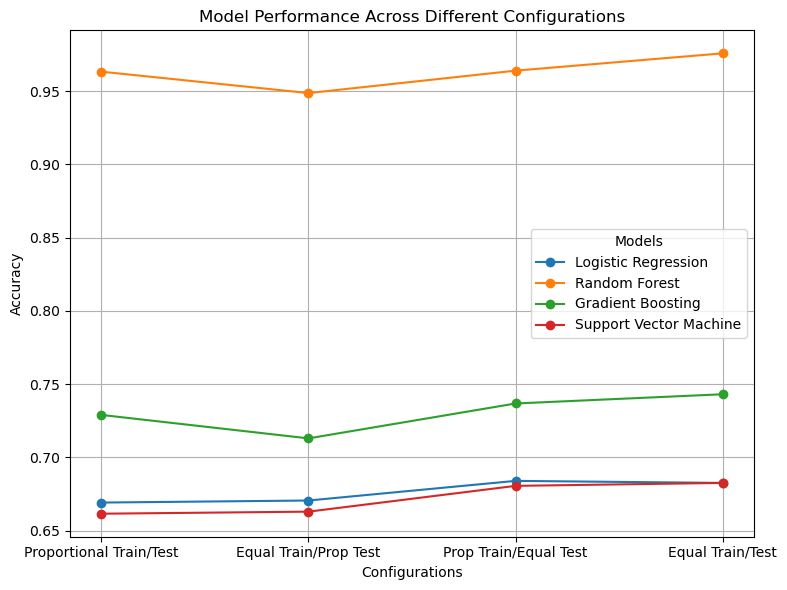

In [14]:
configurations = list(results.keys())
models = list(results[configurations[0]].keys())

plt.figure(figsize=(8, 6))
for model in models:
    accuracies = [results[config][model] for config in configurations]
    plt.plot(configurations, accuracies, marker='o', label=model)

plt.xlabel('Configurations')
plt.ylabel('Accuracy')
plt.title('Model Performance Across Different Configurations')
plt.legend(title="Models")
plt.grid(True)

plt.tight_layout()
plt.show()